In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('C:/Users/THIRU/Documents/DATA SET/Mall_Customers.csv')

In [21]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [6]:
df.shape

(200, 5)

In [7]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

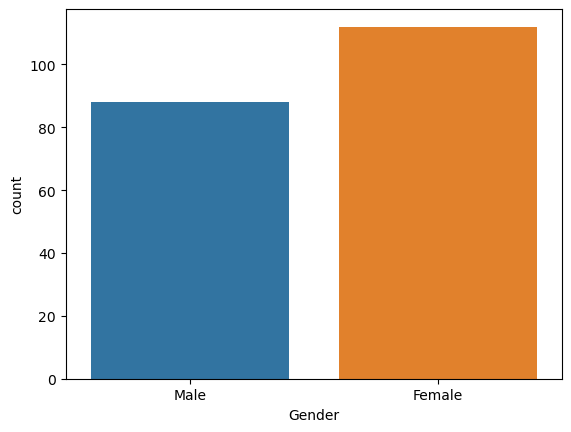

In [8]:
sns.countplot(x=df.Gender)

<Axes: xlabel='Gender', ylabel='Annual Income (k$)'>

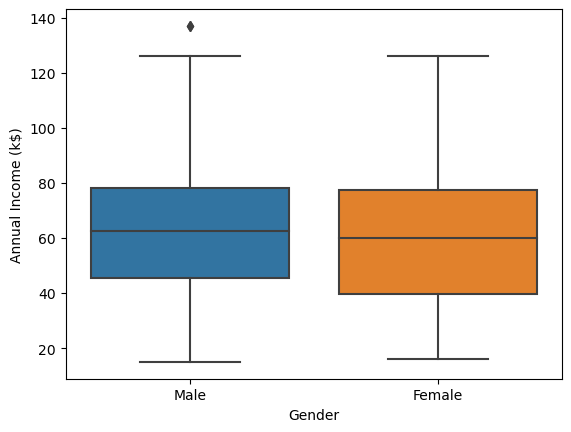

In [11]:
sns.boxplot(x='Gender',y='Annual Income (k$)',data=df)

<Axes: xlabel='Gender', ylabel='Age'>

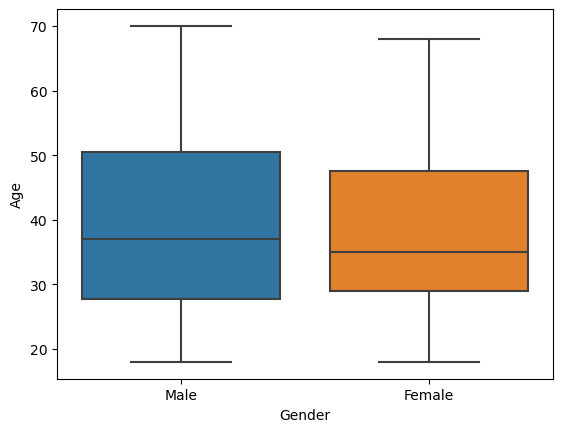

In [12]:
sns.boxplot(x='Gender',y='Age',data=df)

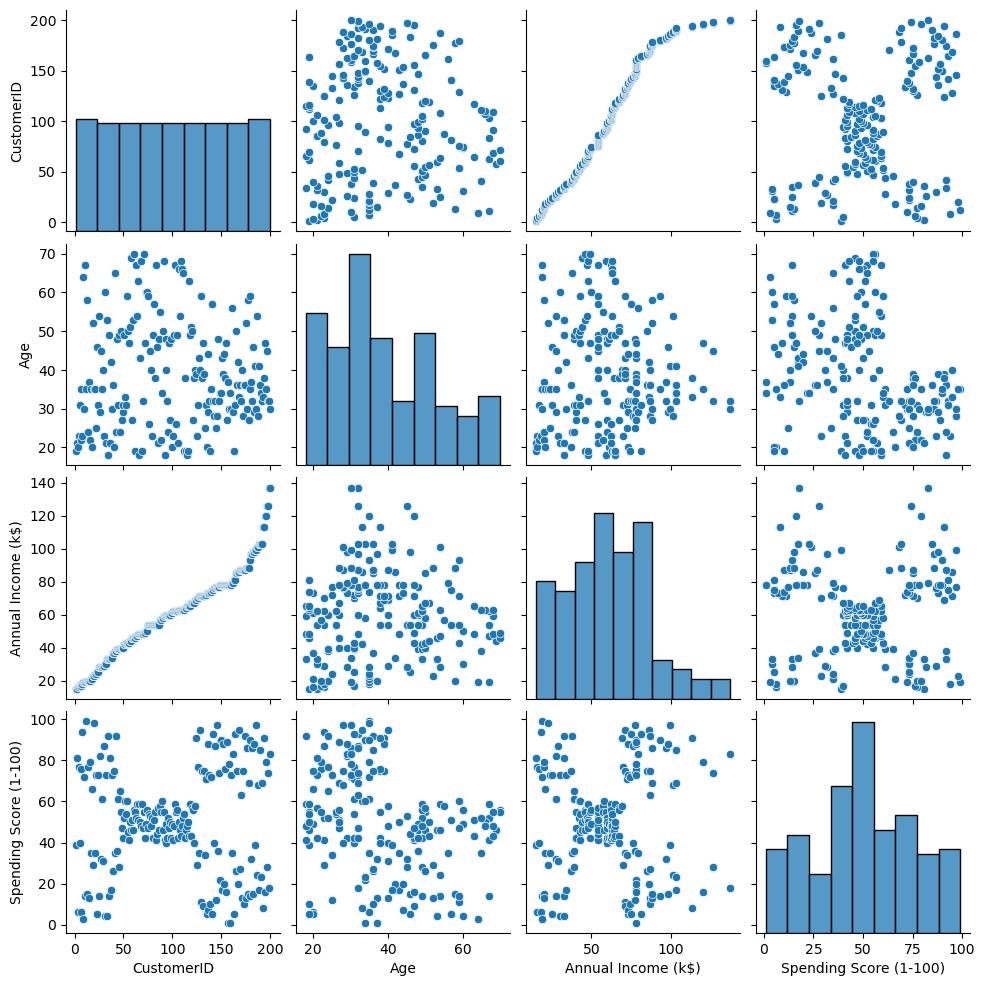

In [13]:
sns.pairplot(df)

In [14]:
df.corr()['Spending Score (1-100)']

C:\Users\THIRU\AppData\Local\Temp\ipykernel_31496\2460015373.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Spending Score (1-100)']


CustomerID                0.013835
Age                      -0.327227
Annual Income (k$)        0.009903
Spending Score (1-100)    1.000000
Name: Spending Score (1-100), dtype: float64

C:\Users\THIRU\AppData\Local\Temp\ipykernel_31496\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

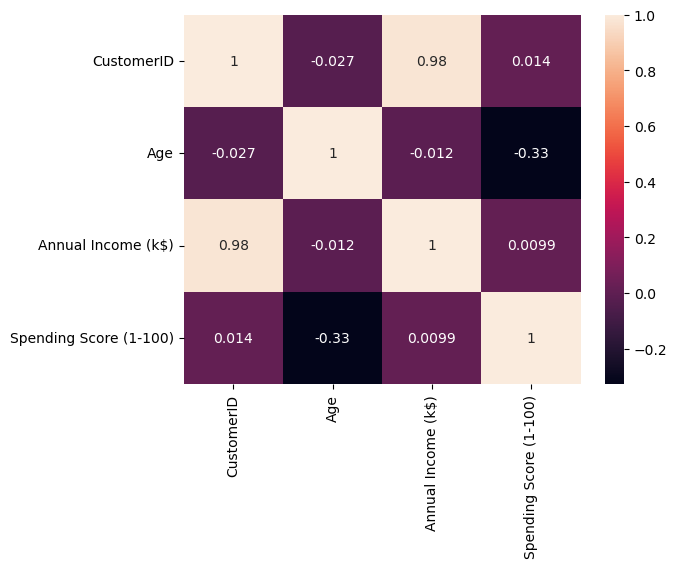

In [15]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

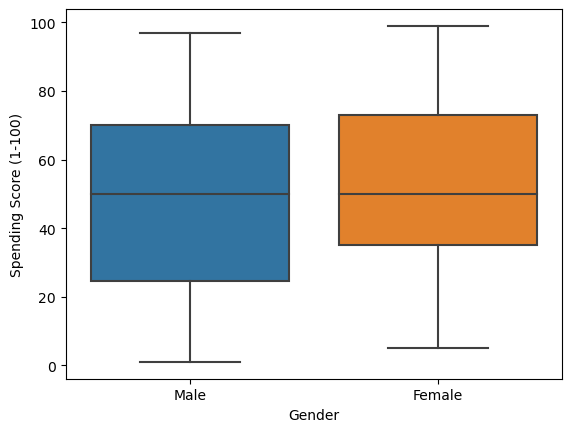

In [18]:
sns.boxplot(x='Gender',y='Spending Score (1-100)',data=df)

In [23]:
df=df.drop(columns='CustomerID',axis=1)

In [24]:
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72


In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le=LabelEncoder()

In [27]:
df['Gender']=le.fit_transform(df.Gender)

In [29]:
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
5,0,22,17,76
6,0,35,18,6
7,0,23,18,94
8,1,64,19,3
9,0,30,19,72


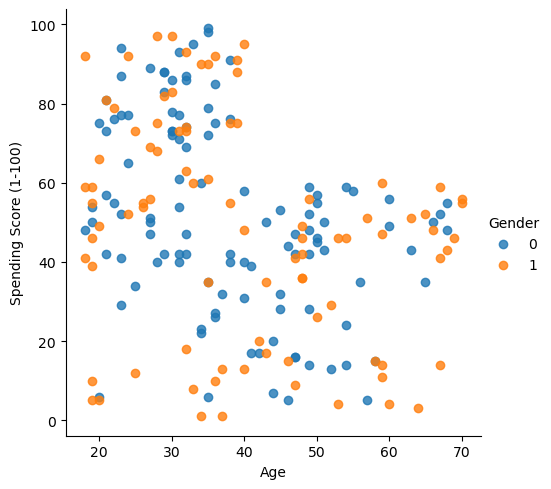

In [37]:
sns.lmplot(x='Age',y='Spending Score (1-100)',data=df,fit_reg=False,hue='Gender',aspect=1)

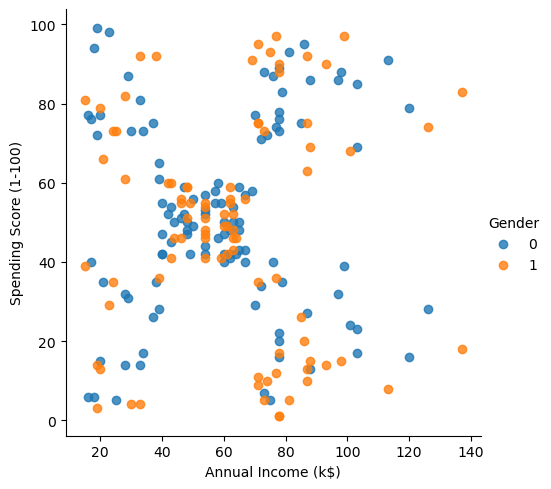

In [38]:
sns.lmplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df,fit_reg=False,hue='Gender',aspect=1)

In [40]:
from sklearn.cluster import KMeans

In [41]:
kmeans=KMeans(n_clusters=2)

In [42]:
kmeans.fit(df.drop('Gender',axis=1))

C:\Users\THIRU\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\THIRU\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

In [46]:
kmeans.cluster_centers_

array([[46.16521739, 59.36521739, 32.88695652],
       [28.95294118, 62.17647059, 73.62352941]])

In [47]:
from sklearn.metrics import confusion_matrix,classification_report

In [48]:
print(confusion_matrix(df['Gender'],kmeans.labels_))

[[65 47]
 [50 38]]


In [49]:
print(classification_report(df['Gender'],kmeans.labels_))

              precision    recall  f1-score   support

           0       0.57      0.58      0.57       112
           1       0.45      0.43      0.44        88

    accuracy                           0.52       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.51      0.52      0.51       200

